In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f=pd.read_csv('lec5-real-data.csv')

In [23]:
f

,year,month,permno,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,cashdebt,cashpr,cfp,cfp_ia,chatoia,chcsho,chempia,chinv,chpmia,convind
0,2000,1,10001,2.082500e+04,0.062785,0.003942,0.093899,8.271964,0.025807,0.068440,...,0.110580,-24.025442,0.298858,0.150156,0.249856,0.012901,-0.076345,-0.074093,-0.137556,0.0
1,2000,1,10002,9.419719e+04,0.487780,0.237929,0.026658,8.875427,0.050570,-0.043096,...,0.018335,-6.261051,NaN,NaN,0.006000,0.816769,-0.031642,0.000385,0.004225,0.0
2,2000,1,10009,3.402825e+04,0.299169,0.089502,-0.093446,10.366105,0.035277,-0.043096,...,NaN,-28.390065,NaN,NaN,-0.001643,0.008790,-0.031642,0.000189,0.012438,0.0
3,2000,1,10012,1.547943e+05,2.389908,5.711660,2.007230,13.700713,0.145355,0.914370,...,-0.481663,20.815493,-0.053164,-0.066766,0.148102,0.015742,-0.091179,0.053732,0.249816,0.0
4,2000,1,10016,3.372774e+05,0.619772,0.384117,-0.183942,11.928143,0.039300,0.351213,...,0.058809,2.865464,0.010084,0.046890,-0.090892,-0.014428,-0.541850,-0.012166,-0.153459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310728,2016,12,93428,1.250976e+06,1.595315,2.545028,-0.137348,14.916210,0.043201,0.016401,...,0.065594,2.513108,0.043555,-0.002498,0.024946,0.004733,0.092304,0.000000,0.115472,1.0
1310729,2016,12,93429,5.600537e+06,0.298267,0.088963,0.206434,16.319190,0.026198,-0.071728,...,1.580322,48.338808,0.046039,-0.063371,0.250537,-0.024074,-0.001802,0.000000,0.058067,0.0
1310730,2016,12,93433,2.473625e+04,2.324893,5.405128,0.328248,9.975208,0.185537,-0.002451,...,-1.214824,30.645440,-0.134452,-0.132299,-0.316830,0.888516,-0.931909,0.000000,-15.764856,0.0
1310731,2016,12,93434,8.573280e+04,0.628519,0.395036,0.020854,10.862196,0.059797,0.015187,...,-0.018161,-10.531395,0.169262,0.351403,0.137229,0.155842,0.795305,-0.028000,-0.291295,1.0


In [3]:
f_year={}

In [4]:
for i in range(2000,2017):
    yearData=f[f['year']==i]
    monthData=yearData[yearData['month']==12][['year','permno']]
    f_year[str(i)]=monthData

In [ ]:
a=f[f['year']==2000]
a[a['month']==12]

In [11]:
m=pd.merge(f_year['2000'],f_year['2001'],on='permno')['permno'].count() #2000和2001都有的股票数量
m

0       10001
1       10002
2       10012
3       10019
4       10025
        ...  
7133    92690
7134    92807
7135    92874
7136    92930
7137    93105
Name: permno, Length: 7138, dtype: int64

In [ ]:
pd.merge(f_year['2010'],m,on='permno')

In [21]:
N={}
for i in range(2000,2017):
    N[i]=f[f['year']==i].count()['permno']

In [22]:
N[2002]

86614

In [25]:
D={}
for i in range(2000,2016):
    D[i]=pd.merge(f_year[str(i)],f_year[str(i+1)],on='permno')['permno'].count()

In [27]:
E={}
for i in range(2001,2017):
    E[i]=N[i]-D[i-1]
    pass
E[2000]=N[2000]

In [32]:
d={}
for i in range(2000,2016):
    d[i]=100*D[i]/N[i]
    pass

In [34]:
e={}
for i in range(2000,2017):
    e[i]=100*E[i]/N[i]
    pass

In [36]:
g={}
for i in range(2000,2016):
    g[i]=100*(E[i]-D[i])/N[i]
    pass

In [44]:
X1=list(range(2000,2017))
X2=list(range(2000,2016))
Y_N=list(N.values())
Y_d=list(d.values())
Y_e=list(e.values())
Y_g=list(g.values())

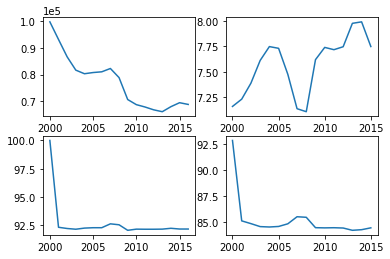

In [46]:
plt.figure()

plt.subplot(2,2,1)
plt.plot(X1,Y_N)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.subplot(2,2,2)
plt.plot(X2,Y_d)

plt.subplot(2,2,3)
plt.plot(X1,Y_e)

plt.subplot(2,2,4)
plt.plot(X2,Y_g)

plt.show()